In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
pizza = pd.read_csv('Pizza_sales.csv')
ingredients = pd.read_csv('Pizza_ingredients.csv')

DATACLEANING FOR PIZZA DATASET

In [3]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
pizza.isna().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [6]:
pizza.dropna()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
pizza.isna().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [8]:
pizza.duplicated().sum()

np.int64(0)

In [9]:
pizza.shape

(48620, 12)

In [10]:
pizza['pizza_name_id'] = pizza['pizza_name_id'].fillna(pizza['pizza_name_id'].mode()[0])  
pizza['pizza_category'] = pizza['pizza_category'].fillna(pizza['pizza_category'].mode()[0])  
pizza['pizza_ingredients'] = pizza['pizza_ingredients'].fillna(pizza['pizza_ingredients'].mode()[0])  
pizza['pizza_name'] = pizza['pizza_name'].fillna('Unknown')  
pizza['total_price'] = pizza['total_price'].fillna(pizza['total_price'].median())  

In [11]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

In [12]:
pizza['order_date'] = pizza['order_date'].apply(parse_dates)

In [13]:
pizza['order_date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: order_date, dtype: datetime64[ns]

In [14]:
pizza['day_of_week'] = pizza['order_date'].dt.dayofweek.astype(int)
pizza['month'] = pizza['order_date'].dt.month.astype(int)
pizza['year'] = pizza['order_date'].dt.year.astype(int)
pizza['is_weekend'] = pizza['day_of_week'].isin([5, 6]).astype(int)
pizza['day_of_year'] = pizza['order_date'].dt.dayofyear.astype(int)
pizza['quarter'] = pizza['order_date'].dt.quarter.astype(int)

In [15]:
holidays = ['2023-12-25', '2023-11-23', '2023-01-01'] 
pizza['is_holiday'] = pizza['order_date'].dt.strftime('%Y-%m-%d').isin(holidays).astype(int)

In [16]:
pizza[['order_date','day_of_week', 'month', 'year', 'is_weekend', 'is_holiday', 'day_of_year', 'quarter']].head(3)

,order_date,day_of_week,month,year,is_weekend,is_holiday,day_of_year,quarter
0,2015-01-01,3,1,2015,0,0,1,1
1,2015-01-01,3,1,2015,0,0,1,1
2,2015-01-01,3,1,2015,0,0,1,1


In [17]:
pizza.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,year,is_weekend,day_of_year,quarter,is_holiday
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1,2015,0,1,1,0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1,2015,0,1,1,0


In [18]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  day_of_week        48620 non-null  int64         
 13  month              48620 non-null  int64         
 14  year  

In [19]:
pizza.nunique()

pizza_id             48620
order_id             21350
pizza_name_id           91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              33
day_of_week              7
month                   12
year                     1
is_weekend               2
day_of_year            358
quarter                  4
is_holiday               1
dtype: int64

In [20]:
pizza.duplicated().sum()

np.int64(0)

In [21]:
pizza.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price,day_of_week,month,year,is_weekend,day_of_year,quarter,is_holiday
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000,48620.000000,48620.000000,48620.0,48620.000000,48620.000000,48620.000000,48620.0
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821448,3.023797,6.451131,2015.0,0.272974,180.460921,2.486672,0.0
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000,0.000000,1.000000,2015.0,0.000000,1.000000,1.000000,0.0
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000,1.000000,3.000000,2015.0,0.000000,90.000000,1.000000,0.0
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000,3.000000,6.000000,2015.0,0.000000,179.000000,2.000000,0.0
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000,5.000000,9.000000,2015.0,1.000000,271.000000,3.000000,0.0
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000,6.000000,12.000000,2015.0,1.000000,365.000000,4.000000,0.0
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437202,1.934155,3.435420,0.0,0.445492,104.907907,1.113634,0.0


In [22]:
pizza.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
day_of_week          0
month                0
year                 0
is_weekend           0
day_of_year          0
quarter              0
is_holiday           0
dtype: int64

In [23]:
pizza.to_csv('Pizzasales.csv')

EDA FOR PIZZA SALES DATASET

In [24]:
print(pizza['pizza_category'].value_counts())  

pizza_category
Classic    14595
Supreme    11771
Veggie     11442
Chicken    10812
Name: count, dtype: int64


In [25]:
print(pizza['pizza_name'].value_counts())

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2369
The Pepperoni Pizza                           2367
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1886
The Sicilian Pizza                            1886
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1810
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1455
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [26]:
print(pizza['pizza_size'].value_counts()) 

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64


In [27]:
print(pizza['pizza_ingredients'].value_counts())  

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2429
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2369
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2300
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1884
Ricotta Cheese, Gorgonzola P

In [28]:
print(pizza['quantity'].value_counts())  

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64


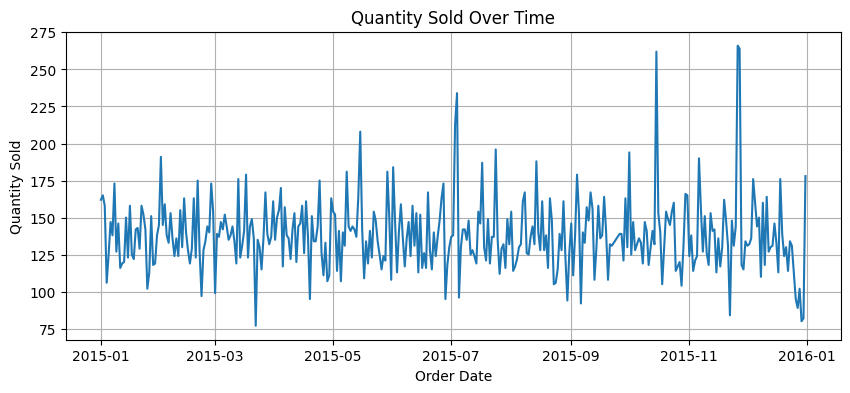

In [31]:
quantity_over_time = pizza.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()


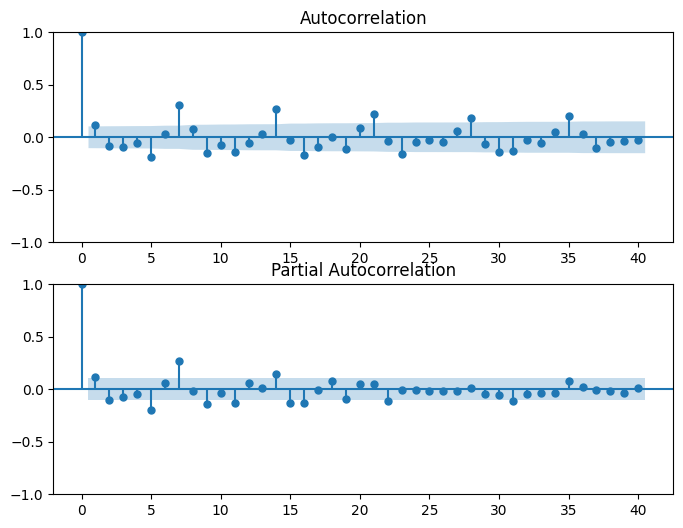

In [33]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
fig = plot_acf(quantity_over_time, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(quantity_over_time, lags=40, ax=ax2)

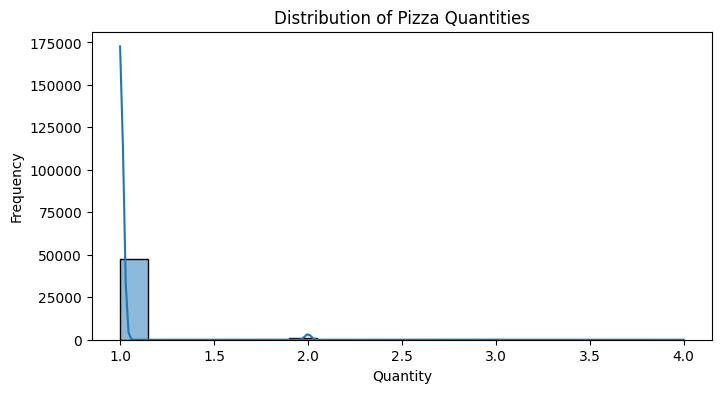

In [34]:
plt.figure(figsize=(8, 4))
sns.histplot(pizza['quantity'], bins=20, kde=True)  
plt.title('Distribution of Pizza Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

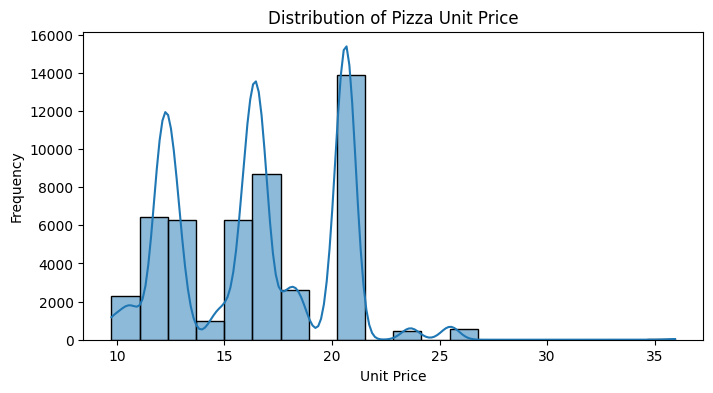

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(pizza['unit_price'], bins=20, kde=True)
plt.title('Distribution of Pizza Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

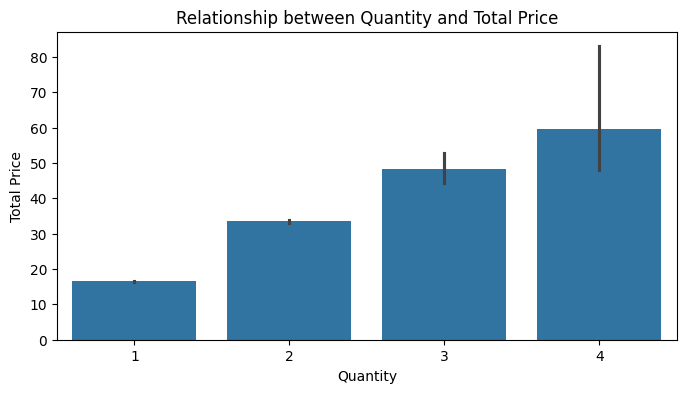

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(x='quantity', y='total_price', data=pizza)
plt.title('Relationship between Quantity and Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

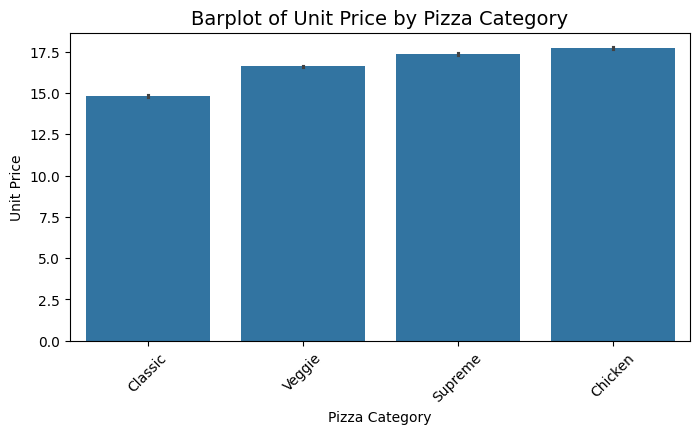

In [37]:
plt.figure(figsize=(8, 4))
sns.barplot(x='pizza_category', y='unit_price', data=pizza)
plt.title('Barplot of Unit Price by Pizza Category',fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Pizza Category')
plt.ylabel('Unit Price')
plt.show()

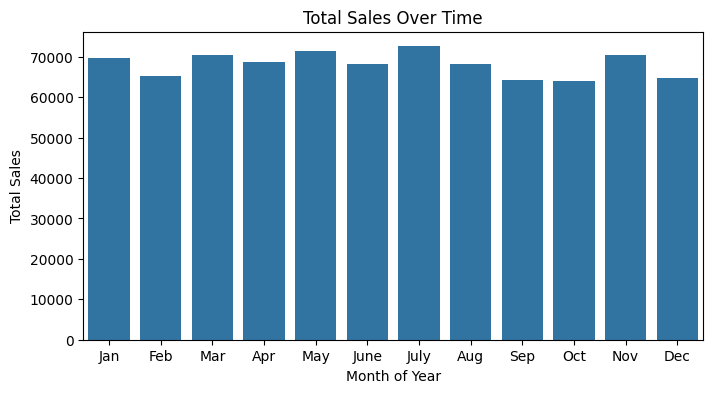

In [38]:
sales_by_date = pizza.groupby('month')['total_price'].sum().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='month', y='total_price', data=sales_by_date)
plt.title('Total Sales Over Time')
plt.xlabel('Month of Year')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

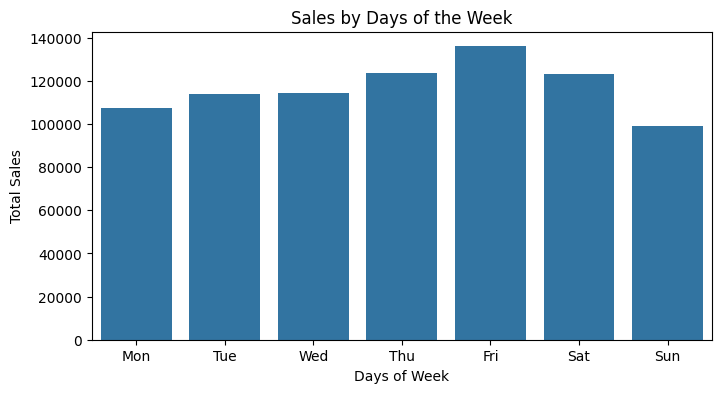

In [39]:
sales_by_day_of_week = pizza.groupby('day_of_week')['total_price'].sum().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='day_of_week', y='total_price', data=sales_by_day_of_week)
plt.title('Sales by Days of the Week')
plt.xlabel('Days of Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

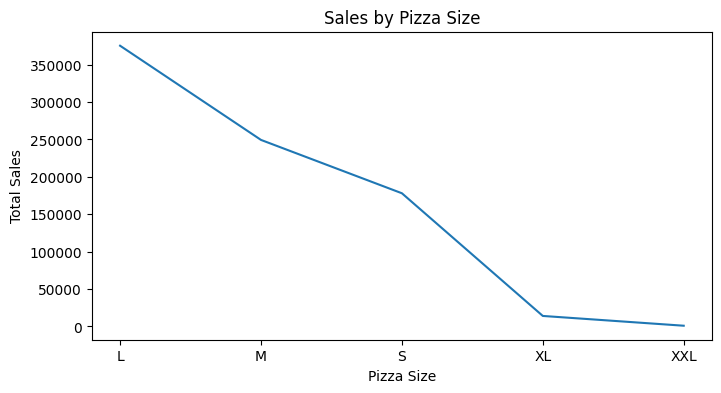

In [40]:
sales_by_size = pizza.groupby('pizza_size')['total_price'].sum().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x='pizza_size', y='total_price', data=sales_by_size)
plt.title('Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.show()


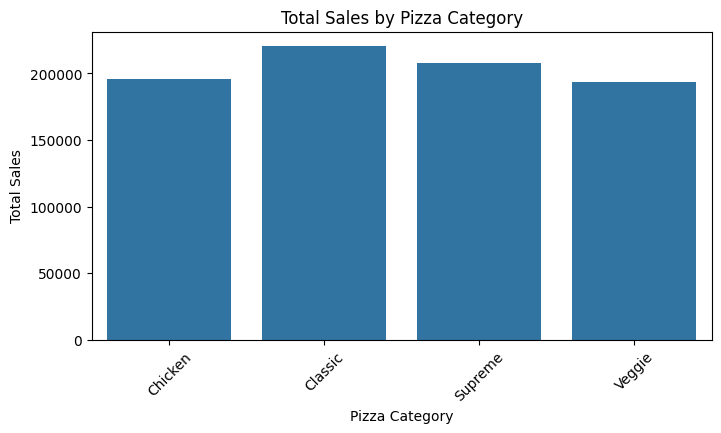

In [41]:
sales_by_category = pizza.groupby('pizza_category')['total_price'].sum().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='pizza_category', y='total_price', data=sales_by_category)
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

DATACLEANING FOR INGREDIENTS DATASET

In [42]:
ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [43]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [44]:
ingredients.isna().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [45]:
ingredients['Items_Qty_In_Grams'] = ingredients['Items_Qty_In_Grams'].fillna(ingredients['Items_Qty_In_Grams'].median())

In [46]:
ingredients.dropna(inplace=True)

In [47]:
ingredients.isna().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64

In [48]:
ingredients.shape

(518, 4)

In [49]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [50]:
ingredients.nunique()

pizza_name_id         91
pizza_name            32
pizza_ingredients     64
Items_Qty_In_Grams    17
dtype: int64

In [51]:
ingredients.duplicated().sum()

np.int64(0)

In [52]:
print(ingredients['pizza_name_id'].value_counts())  

pizza_name_id
spinach_supr_s    8
spinach_supr_l    8
spinach_supr_m    8
veggie_veg_l      8
southw_ckn_m      8
                 ..
prsc_argla_s      3
prsc_argla_m      3
pepperoni_s       2
pepperoni_l       2
pepperoni_m       2
Name: count, Length: 91, dtype: int64


In [53]:
print(ingredients['pizza_name'].value_counts()) 

pizza_name
The Greek Pizza                               30
The Spinach Supreme Pizza                     24
The Mexicana Pizza                            24
The Southwest Chicken Pizza                   24
The Vegetables + Vegetables Pizza             24
The California Chicken Pizza                  21
The Mediterranean Pizza                       21
The Italian Vegetables Pizza                  21
The Italian Supreme Pizza                     18
The Sicilian Pizza                            18
The Pepper Salami Pizza                       18
The Barbecue Chicken Pizza                    18
The Chicken Pesto Pizza                       18
The Italian Capocollo Pizza                   18
The Chicken Alfredo Pizza                     18
The Calabrese Pizza                           18
The Spinach Pesto Pizza                       18
The Spicy Italian Pizza                       18
The Spinach and Feta Pizza                    15
The Napolitana Pizza                          15
The Thai 

In [54]:
print(ingredients['pizza_ingredients'].value_counts()) 

pizza_ingredients
Garlic                57
Tomatoes              56
Red Onions            41
Red Peppers           30
Spinach               24
                      ..
Chorizo Sausage        1
Prosciutto             1
Caramelized Onions     1
Romano Cheese          1
Blue Cheese            1
Name: count, Length: 64, dtype: int64


In [55]:
print(ingredients['Items_Qty_In_Grams'].value_counts(ascending=False))

Items_Qty_In_Grams
10.0     99
20.0     95
15.0     69
30.0     60
5.0      48
40.0     41
60.0     35
50.0     17
100.0    16
150.0    13
45.0     10
90.0      3
25.0      3
80.0      3
70.0      3
120.0     2
200.0     1
Name: count, dtype: int64


In [56]:
ingredients.describe()

,Items_Qty_In_Grams
count,518.000000
mean,30.482625
std,30.248147
min,5.000000
25%,10.000000
50%,20.000000
75%,40.000000
max,200.000000


In [57]:
ingredients.to_csv('Pizzaingredients.csv')

EDA FOR INGREDIENTS DATASET

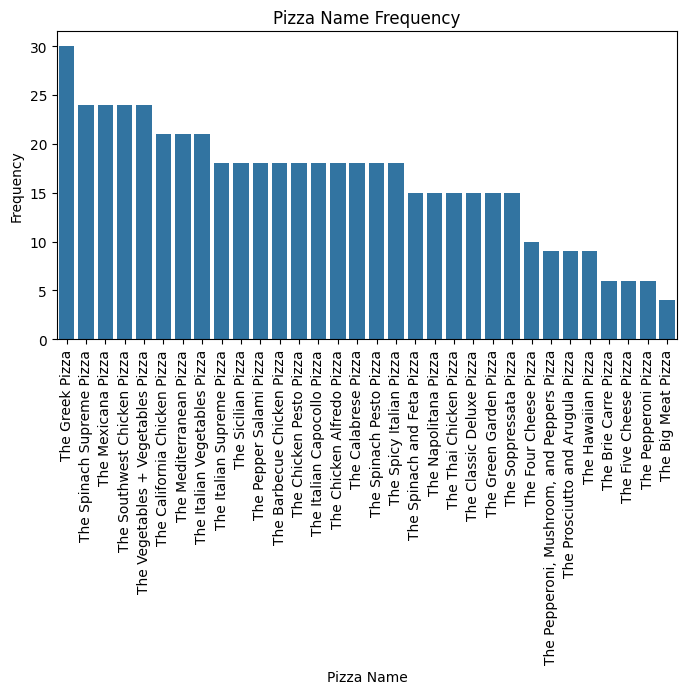

In [58]:
plt.figure(figsize=(8, 4))
pizza_order = ingredients['pizza_name'].value_counts().index
sns.countplot(x='pizza_name', data=ingredients, order=pizza_order)
plt.title('Pizza Name Frequency')
plt.xlabel('Pizza Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [59]:
all_ingredients = pizza['pizza_ingredients'].str.split(', ').explode().value_counts()
all_ingredients

pizza_ingredients
Garlic                27415
Tomatoes              26598
Red Onions            19557
Red Peppers           16294
Mozzarella Cheese     10328
                      ...  
Brie Carre Cheese       480
Prosciutto              480
Caramelized Onions      480
Pears                   480
Thyme                   480
Name: count, Length: 65, dtype: int64

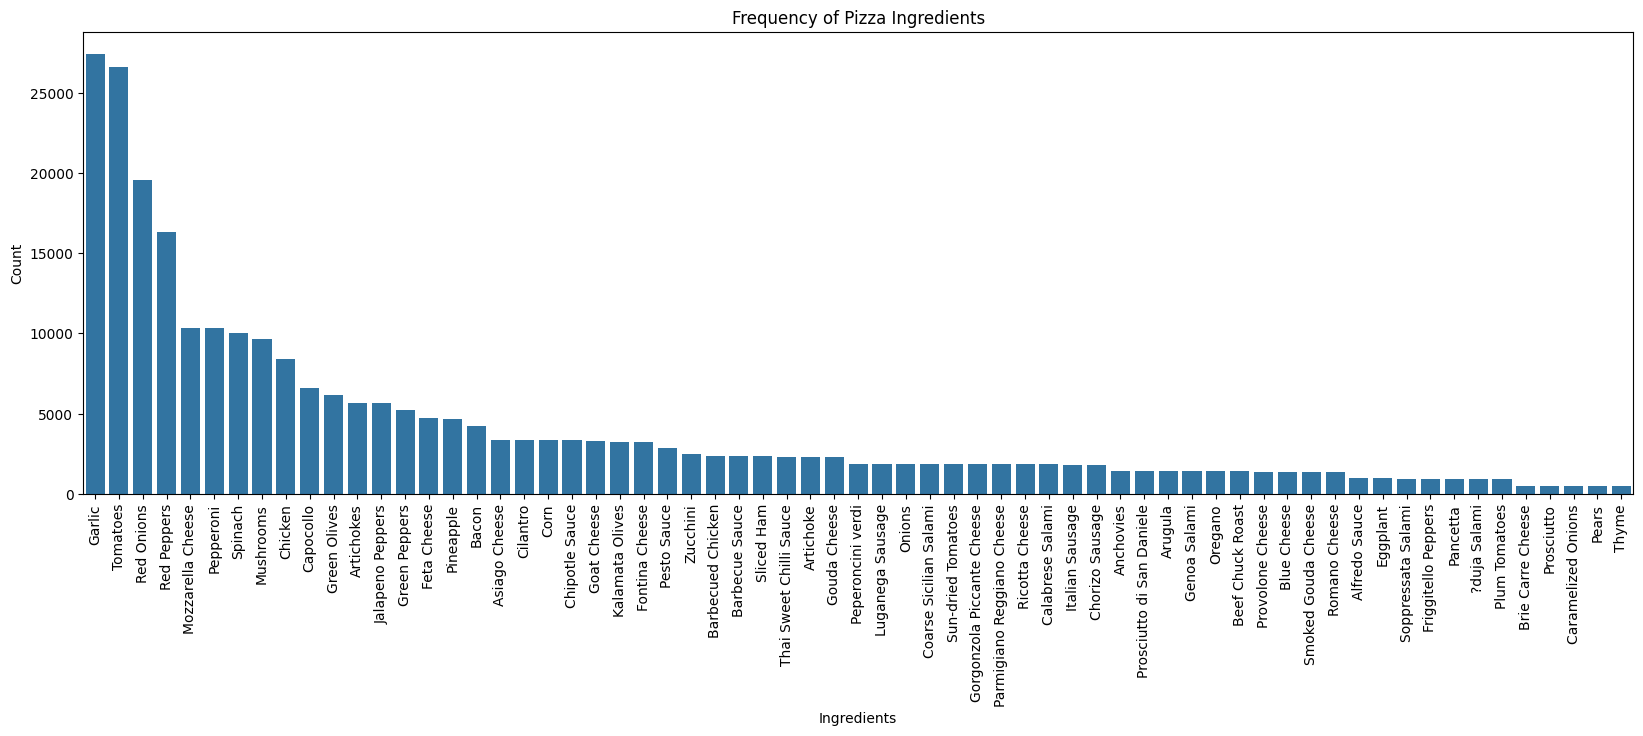

In [60]:
plt.figure(figsize=(20, 6))
sns.barplot(x=all_ingredients.index, y=all_ingredients.values)
plt.title('Frequency of Pizza Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


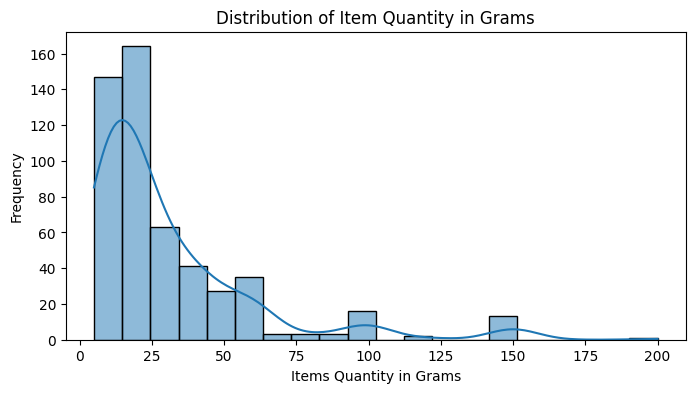

In [61]:
plt.figure(figsize=(8, 4))
sns.histplot(ingredients['Items_Qty_In_Grams'], bins=20, kde=True)
plt.title('Distribution of Item Quantity in Grams')
plt.xlabel('Items Quantity in Grams')
plt.ylabel('Frequency')
plt.show()

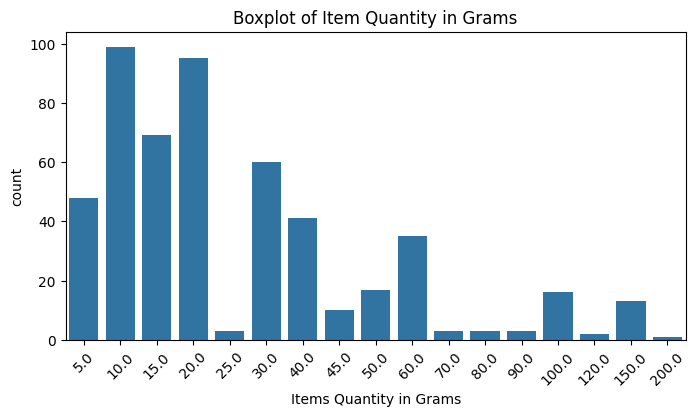

In [62]:
plt.figure(figsize=(8, 4))
sns.countplot(x=ingredients['Items_Qty_In_Grams'])
plt.title('Boxplot of Item Quantity in Grams')
plt.xlabel('Items Quantity in Grams')
plt.xticks(rotation=45)
plt.show()